In [4]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
trip = pd.read_csv('/Users/Robert/Documents/OrganizacionDeDatos/data/trip.csv')

In [12]:
trip.sample(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
67017,93362,315,11/12/2013 16:02,Powell at Post (Union Square),71,11/12/2013 16:07,Washington at Kearney,46,453,Subscriber,94109
99792,138404,3556,12/30/2013 14:10,Harry Bridges Plaza (Ferry Building),50,12/30/2013 15:10,Harry Bridges Plaza (Ferry Building),50,277,Customer,90026
455075,730723,776,4/17/2015 17:56,Temporary Transbay Terminal (Howard at Beale),55,4/17/2015 18:09,Townsend at 7th,65,606,Subscriber,94107


In [22]:
trip.sample(2)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,hour
663939,441179,6485,9/6/2014 16:24,Embarcadero at Sansome,60,9/6/2014 18:12,Embarcadero at Sansome,60,419,Customer,78722,9/6/2014,16:24
281854,245159,309,4/11/2014 14:59,Grant Avenue at Columbus Avenue,73,4/11/2014 15:04,Clay at Battery,41,352,Subscriber,94107,4/11/2014,14:59


In [42]:
trip.shape

(669959, 13)

In [55]:
del trip['annual_member'] 

In [56]:
trip['subscription_type'].value_counts()

Subscriber    566746
Customer      103213
Name: subscription_type, dtype: int64

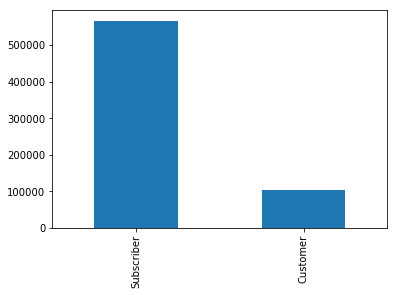

In [54]:
trip['subscription_type'].value_counts().plot.bar()

In [57]:
date = trip.loc[:,'start_date'].str.split(' ')
trip['date'] = date.map(lambda date: date[0])
trip['hour'] = date.map(lambda hour: hour[1])
trip['hour'] = trip.loc[:,'hour'].str.split(':').map(lambda h: h[0])


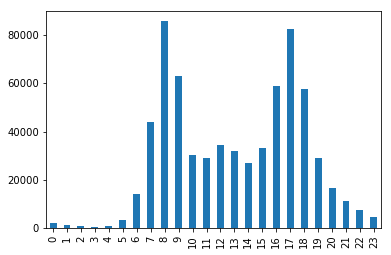

In [86]:
# Cantidad de bicicletas retiradas por hora
trip.sort_values(by=('hour'), ascending=True)['hour']\
    .map(lambda x :int(x)).value_counts().sort_index().plot.bar()


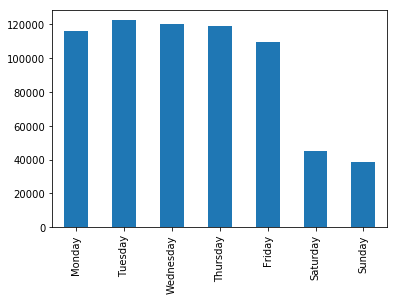

In [109]:
# Cantidad de bicicletas por dia de la semana
import calendar
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip['weekday'] = trip['start_date'].dt.dayofweek
trip['weekday'].value_counts().sort_index().rename(lambda x: calendar.day_name[x])\
                .plot.bar()

In [113]:
#Convert to datetime so that it can be manipulated more easily
trip['date'] = pd.to_datetime(trip['start_date']).dt.date
trip['date'].value_counts()


2014-09-15    1516
2014-08-26    1513
2014-10-14    1496
2014-10-29    1496
2014-08-27    1479
2015-08-26    1465
2014-10-16    1462
2014-10-02    1452
2015-07-28    1451
2015-08-27    1443
2014-09-16    1438
2015-06-11    1437
2014-09-17    1429
2014-10-24    1427
2015-08-25    1421
2014-10-28    1419
2015-08-17    1418
2015-06-04    1414
2015-07-29    1411
2014-10-30    1411
2014-11-06    1410
2014-10-21    1410
2015-03-25    1409
2015-06-16    1409
2015-08-18    1407
2015-07-08    1405
2014-09-03    1404
2015-03-30    1403
2015-08-13    1401
2015-08-12    1400
              ... 
2015-03-22     280
2013-12-07     277
2014-11-28     277
2015-01-18     275
2013-12-08     274
2013-11-28     272
2015-06-14     269
2014-11-16     267
2015-05-10     267
2015-05-31     266
2014-12-14     264
2015-01-25     259
2015-02-01     251
2014-01-11     247
2014-12-21     246
2014-11-23     235
2014-12-27     231
2015-04-05     216
2014-03-02     208
2015-01-04     206
2015-01-01     181
2014-12-25  

In [112]:
type(trip.date[1])

datetime.date

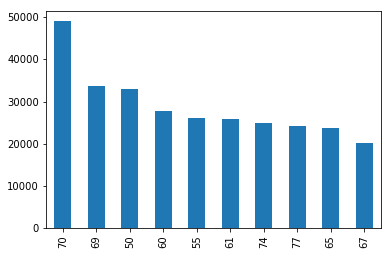

In [145]:
# 10 Estaciones donde se retiran mas bicicletas
trip.start_station_id.value_counts().sort_values(ascending = False)\
    .nlargest(10).plot.bar()


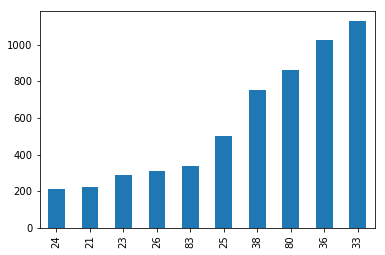

In [147]:
# 10 Estaciones donde se retiran menos bicicletas
trip.start_station_id.value_counts().sort_values(ascending = True)\
    .nsmallest(10).plot.bar()

In [92]:
# Cantidad de viajes que superaron los 30 minutos.
trip['duration'] = trip['duration'].map(lambda x: int(x)/60)
no_exceeded_30min = trip.sort_values(by = 'duration', ascending = False).loc[trip.duration < 1801].shape 
exceeded_30min = tuple(map(lambda x, y: x - y, trip.shape,no_exceeded_30min))

print 'De: '+ str(trip.shape[0]) + ' viajes solo se pasan de 30 minutos: ' + str(exceeded_30min[0])
# Segun lo revisado en http://www.bayareabikeshare.com/pricing
# Se cobra un adicional si se superan los 30 minutos de uso.
# Se ve claramente que hay pocos registros de viajes que superen este límite.

De: 669959 viajes solo se pasan de 30 minutos: 204


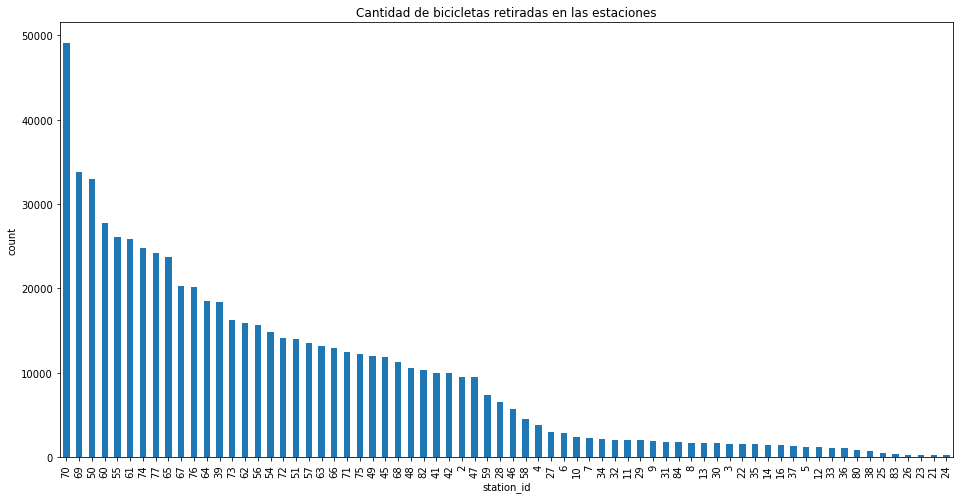

In [95]:
# Estaciones donde se retiran bicicletas
plt.figure()
trip.start_station_id.value_counts().sort_values(ascending = False)\
    .plot.bar(figsize = (16,8), title = "Cantidad de bicicletas retiradas en las estaciones")
plt.xlabel('station_id')
plt.ylabel('count')
   
